# Norma <3

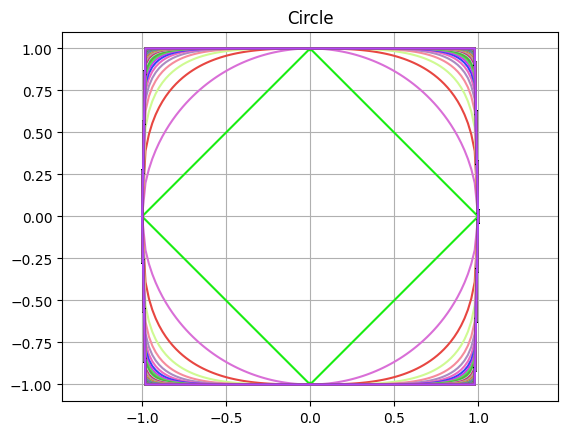

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint

def rgb2hex(r,g,b):
    """
    Función para transformar un color de rgb a hexadecimal
    Entradas: RGB(r,g,b): numero de cantidad de red, green y blue
    Salidas: codigo hexadecimal del color rgb
    """
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

lim = 1000
x = np.linspace(-1, 1, 100)
p = 1
f = lambda x: (1-(abs(x)**p))**(1/p)

while p <= lim:
  actualColor = rgb2hex(randint(0, 255), randint(0, 255), randint(0, 255))
  plt.plot(x, f(x), '-', color=actualColor)
  plt.plot(x, -f(x), '-', color=actualColor)
  p += 1

plt.title("Circle")
plt.axis('equal')
plt.grid()
plt.show()

# Tarea K-Means

## Definición Algoritmos

In [4]:
import math
import numpy as np
from matplotlib import pyplot as plt
from random import randint, random
from matplotlib.animation import FuncAnimation

def rgb2hex(r,g,b):
    """
    Función para transformar un color de rgb a hexadecimal
    Entradas: RGB(r,g,b): numero de cantidad de red, green y blue
    Salidas: codigo hexadecimal del color rgb
    """
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

def norma(x, y, p=2):
  """
  Función que calcula la norma p entre dos vectores (la norma infinito no esta
  del todo configurada)
  Entradas: -p: norma a calcular
            -x: vector numero 1
            -y: vector numero 2
  Salidas: -ans: valor de la norma p entre los dos puntos
  """
  ans = 0
  for i in range(len(x)):
    ans += (abs(x[i]-y[i]))**p
  return ans**(1/p)

def plot(point, centroid, colors, col_c, index):
  x = [point[i][0] for i in range(len(point))]
  y = [point[i][1] for i in range(len(point))]
  plt.plot(x, y, '*', color=colors, label=f"Centroid{index}")
  plt.plot(centroid[0], centroid[1], 'o', markersize=10, color=col_c)

def k_means(centroides, points, norm=2, rn=2, tol=0.001):
  """
  Función  para  calcular  el  clustering  de  k centroides entre un conjunto de
  puntos de dimensión n. (ojo que el plot solo sirve con dimensión 2)
  Entradas: -centroides: puntos para el clustering
            -points: nube de puntos para hacer los clusters
            -norm: norma para usar en la distancia entre los puntos. Por defecto
                   se usa la norma 2
            -rn: dimensión de los puntos. Por defecto la dimension es de 2
            -tol: tolerancia para terminar la ejecución del algoritmo. Por
                  defecto la toleracia es de e^-3
  Salidas: Graficos de los centroides con los puntos
  """
  new_tol = 100
  while new_tol > tol:
    nube = dict()
    new_centroides = [[0 for _ in range(rn)] for _ in range(len(centroides))]
    for i in range(len(centroides)): nube[i] = []
    for point in points:
      ans = [0, math.inf]
      for i in range(len(centroides)):
        val = norma(point, centroides[i], norm)
        if ans[1] > val: ans = [i, val]
      nube[ans[0]].append(point)
      for i in range(rn): new_centroides[ans[0]][i] += point[i];

    new_tol = 0
    for key in nube:
      for i in range(rn):
        if len(nube[key]) > 0: new_centroides[key][i] /= len(nube[key])
        else: new_centroides[key] = centroides[key]
      new_tol = max(new_tol, norma(new_centroides[key], centroides[key], norm))
    centroides = new_centroides.copy()
  return centroides, nube

def plotear(centroides, nube):
  colores = [rgb2hex(randint(0, 255),randint(0, 255),randint(0, 255))
                                    for _ in range(len(centroides)+1)]
  for key in nube:
    plot(nube[key], centroides[key], colores[key], colores[-1], key+1)
  plt.title(f"K-Means con {len(centroides)} centroides")
  plt.legend()
  plt.show()

def looking_for_centroids(points, string, cantidad_max = 12, norm=2, rn=2,
                          tol=0.001):
  """
  Función para hallar la inercia para una cantidad maxima de centroides en una
  nube de puntos. E imprimirlos en un grafico para usar el metodo del codo.
  Entradas: -points: nube de puntos para hacer los clusters
            -cantidad_max: son la cantidad maxima de centroides que vamos a
                           evaluar para medir la entropia
            -string: una cadena de texto para el titulo del grafico
            -norm: norma a usar para medir la distancia entre puntos
            -rn: dimensión de los puntos. Por defecto la dimension es de 2
            -tol: tolerancia para terminar la ejecución del algoritmo. Por
                  defecto la toleracia es de e^-3
  Salidas: ans es un vector de la entrepia por la cantidad de centroides
  """
  ans = [0 for _ in range(cantidad_max)]
  point_min = [min(points[i]) for i in range(rn)]
  point_max = [max(points[i]) for i in range(rn)]
  for j in range(cantidad_max):
    centroides = [[point_min[i]+random()*(point_max[i]-point_min[i])
                                                  for i in range(rn)]
                                                  for _ in range(j+1)]
    centroides, nube = k_means(centroides, points, norm=norm, rn=rn, tol=tol)
    for i in range(len(centroides)):
      for point in nube[i]:
        ans[j] += (norma(point, centroides[i], norm)**2)
  plt.plot([i+1 for i in range(cantidad_max)], ans, "-o", color ="black")
  plt.title(f"Centroides for exercise {string}")
  plt.show()
  return ans


## Import Data

In [9]:
#Lectura de CSV

import pandas as pd
import numpy as np
import math

arr_ejercicio1 = np.loadtxt("./CSV/Cod_Alg_Lineal/mi_array.csv",
                 delimiter=",", dtype=int)

arr_ejercicio2 = pd.read_csv("./CSV/Cod_Alg_Lineal/analisis.csv")
arr_ejercicio2

op = list(arr_ejercicio2["op"])
co = list(arr_ejercicio2["co"])
ex = list(arr_ejercicio2["ex"])
ag = list(arr_ejercicio2["ag"])
ne = list(arr_ejercicio2["ne"])
wordcount = list(arr_ejercicio2["wordcount"])
categoria = list(arr_ejercicio2["categoria"])

matriz = [op, co, ex, ag, ne, wordcount]
flag = math.inf
res = []

def hallar_mejor_val(num, index):
  global res, flag, matriz
  if(len(index) == 3):
    ans = 0
    for i in range(2):
      for j in range(1, 3):
        ans += np.dot(matriz[index[i]], matriz[index[j]])
    if abs(ans) < flag: flag, res = ans, index.copy()
  else:
    for i in range(num, len(matriz)):
      hallar_mejor_val(i+1, index+[i])


hallar_mejor_val(0, [])
print(res)
points_ejer2 = [[matriz[res[0]][i], matriz[res[1]][i], matriz[res[2]][i]] for i in range(len(matriz[0]))]


[1, 3, 4]


## Codigo

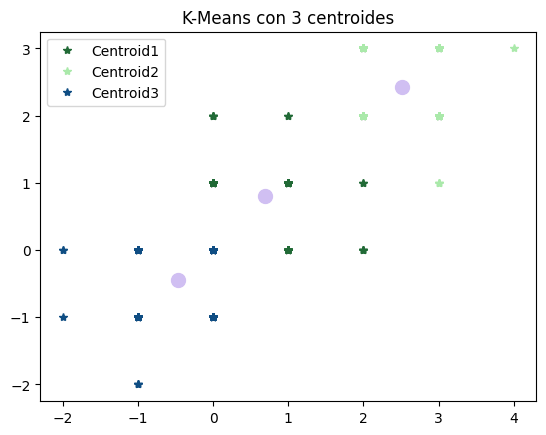

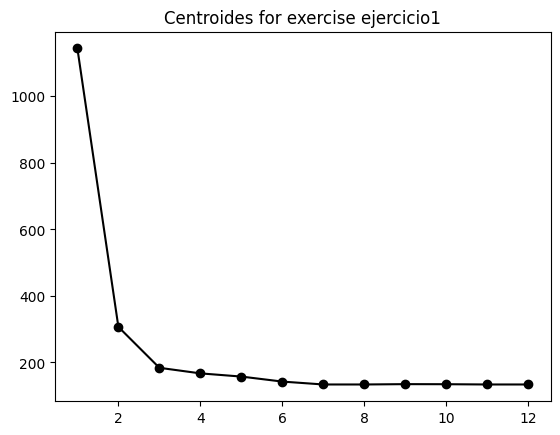

[1143.826666666668, 306.75215855573003, 183.7649377949376, 166.9922800735419, 157.37743413516642, 142.30716475095727, 133.61214578367102, 133.6121457836707, 134.6216695931946, 134.40579657732184, 133.61214578367066, 133.61214578367046]


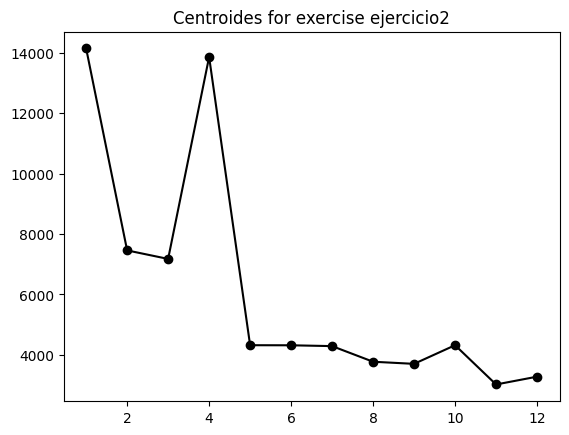

[14136.897635435276, 7455.769482447122, 7174.00302998088, 13855.749209263318, 4318.874596591321, 4316.297458733236, 4288.992136908221, 3772.016039957526, 3702.2048384321492, 4318.805082030249, 3019.643261534746, 3278.0638863636614]


In [10]:
n = 10000
m = 3
point_min = [min(arr_ejercicio1[i]) for i in range(2)]
point_max = [max(arr_ejercicio1[i]) for i in range(2)]
# points = [[point_min[i]+random()*(point_max[i]-point_min[i]) for i in range(2)] for _ in range(n+1)]
centroides = [[point_min[i]+random()*(point_max[i]-point_min[i]) for i in range(2)] for _ in range(m)]

centroides, nube = k_means(centroides, arr_ejercicio1)
plotear(centroides, nube)
values = looking_for_centroids(arr_ejercicio1, "ejercicio1")
print(values)
values = looking_for_centroids(points_ejer2, "ejercicio2", rn=3)
print(values)

# Gram-Schmidt process

## code definition

In [11]:
from re import I
import math
import numpy as np

def gram_schmidt(matriz):
  assert len(matriz) >= len(matriz[0]), "tenga mas fials que columnas"
  matriz, ans = matriz.transpose(), []
  for n in range(len(matriz)):
    x_n = matriz[n]
    temp = x_n.copy()
    for i in range(n):
      x_i = matriz[i]
      xn_xi = np.inner(x_n, x_i)
      xi_xi = np.inner(x_i, x_i)
      temp = temp-(xn_xi/xi_xi)*x_i
    ans.append(temp)
  ans = np.array(ans)
  return ans

## Pruebas

8
[[ 2. -2.]
 [ 1.  1.]]
0.0


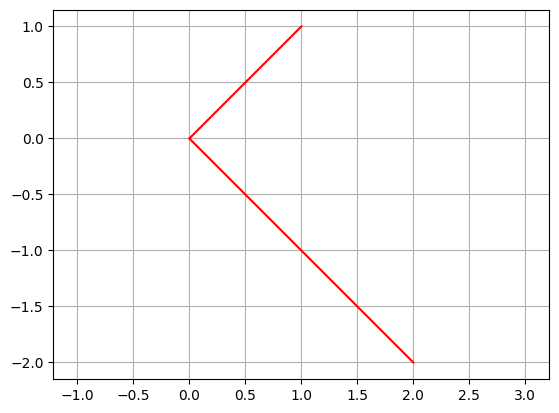

8
-6
-3
[[ 1.00000000e+00  0.00000000e+00  1.00000000e-01]
 [ 9.90099010e-04 -1.00000000e+00 -9.90099010e-03]
 [-1.08910891e-01  8.91089109e-03  9.80198020e-01]]
6.389278545181903e-19
-0.0187236545436722
-0.0108910891089109


In [12]:
from matplotlib import pyplot as plt

matriz = np.array([[2, 3], [-2, -1]])

print(np.inner([2,-2], [3,-1]))

ans = gram_schmidt(matriz)
print(ans)
print(np.inner(ans[0], ans[1]))

x = [0, ans[0][0]]
y = [0, ans[0][1]]
plt.plot(x, y, "-", color="red")
x = [0, ans[1][0]]
y = [0, ans[1][1]]
plt.plot(x,y, "-", color="red")
plt.axis('equal')
plt.grid()
plt.show()

matriz = np.array([[1, 0.1,0.1],
          [0, -1, -0.1],
          [0.1,0, 1]])

print(np.inner([2,-2, 0], [3,-1, 2]))
print(np.inner([2,-2, 0], [1, 4,-1]))
print(np.inner([1, 4,-1], [3,-1, 2]))

ans = gram_schmidt(matriz)
print(ans)

print(np.inner(ans[0], ans[1]))
print(np.inner(ans[2], ans[1]))
print(np.inner(ans[0], ans[2]))


# Regresion multivariada

## Newton Rhapson

### Definición de Newton Rhapson

In [14]:
import numpy as np
import sympy as sym
from pprint import pprint

def newton_rhapson(f, x0, tol=0.0001, iter=50):
  """
  Función que calcula el cero de una función de Rn
  Entradas: f: Función en Rn
            x0: valor inicial
            tol: tolerancia
            iter: maximo de iteraciones
  Salida: ans: tupla con el valor obtenido y un mensaje en caso de que el metodo
               si converge, falla o no converge
  """
  simb_x = [sym.Symbol("x" + str(i)) for i in range(len(x0))] #Creación de variables simbolicas igual a la cantidad de elementos en el valor inicial
  mat = sym.Matrix(f(simb_x)) #sympy matrix para la función f de numpy
  JF = sym.lambdify([simb_x], mat.jacobian(simb_x)) #Hallar la jacobiana y transformarla en un array de numpy
  pprint(simb_x)
  pprint(mat)
  pprint(JF)
  i, y, ans, flag = 0, x0, None, True #Creación del iterador, respuesta del metodo, salida, y una bandera por si el metodo falla
  while np.linalg.norm(f(x0)) >= tol and i < iter and flag: #Mientras el resultado cumpla con la tolerancia, o no se halla llegado al numero de iteraciones o la bandera sea cierta
    if (np.linalg.det(JF(x0)) == 0): ans, flag = (np.array([]), "Error"), False #Si la jacobiana es 0 el metodo falla y la bandera de fallo se activa
    else: #Creación del sistema de ecuacions F(x0) = -JF(x0)(x1 - x0) => Ay = b
      b = f(x0)
      A = -JF(x0)

      #Resolver el sistemas de ecuaciones usando QR Ax=b => QRx=b => Rx = Q^{-1}b => Rx = Q^Tb
      Q,R = np.linalg.qr(A) # qr decomposition of A
      QT = np.transpose(Q)
      y = np.dot(QT, b)
      y = np.linalg.solve(R, y)
      x0 = y + x0
      i += 1

  if i >= iter and flag: ans = (np.array([]), "No encontrado")
  elif flag: ans = (np.array(x0), "Encontrado")
  return ans

### Ejemplo

In [15]:
f = lambda x: np.array([(2*x[0]**2) + (2*x[0]*x[1])+(x[1]**2)-1, (x[0]**2)-(3*x[0]*x[1])+(3*x[1]**2)-1])

x0 = newton_rhapson(f, np.array([1, 0]))
pprint(x0)
if x0[0].any():
  pprint(f(np.array(x0[0])))

f = lambda x: np.array([2*x[0]-x[1], x[0]**2 + x[1]**2 - 1])

x0 = newton_rhapson(f, np.array([1, 0]))
pprint(x0)
if x0[0].any():
  pprint(f(np.array(x0[0])))

[x0, x1]
Matrix([
[2*x0**2 + 2*x0*x1 + x1**2 - 1],
[x0**2 - 3*x0*x1 + 3*x1**2 - 1]])
<function _lambdifygenerated at 0x00000245842C6C00>
(array([ 0.77559916, -0.14436952]), 'Encontrado')
array([4.92350166e-06, 3.72074590e-07])
[x0, x1]
Matrix([
[        2*x0 - x1],
[x0**2 + x1**2 - 1]])
<function _lambdifygenerated at 0x00000245856163E0>
(array([0.44721378, 0.89442756]), 'Encontrado')
array([0.00000000e+00, 8.21212746e-07])


## Gradiente Descendiente

### Definición

In [16]:
import numpy as np
import sympy as sym
from pprint import pprint

def descendent_gradient(f, x0, ax1, alpha=0.01, iter=200):
  simb_x = [sym.Symbol("x" + str(i)) for i in range(len(x0))] #Creación de variables simbolicas igual a la cantidad de elementos en el valor inicial
  mat = sym.Matrix([f(simb_x)]) #sympy matrix para la función f de numpy
  df = sym.lambdify([simb_x], mat.jacobian(simb_x)) #Hallar el gradiente y transformarla en un array de numpy
  for _ in range(iter):
    x1 = x0 - alpha*df(x0)[0]
    if(len(x1) == 2): ax1.scatter([x1[0]], [x1[1]], f(x1), c ='r', marker='o')
    if f(x1) < f(x0): x0 = x1
    else: break;
  return x0

### Ejemplo 1

[0.01758795 0.01758795] 2.0006186717316115


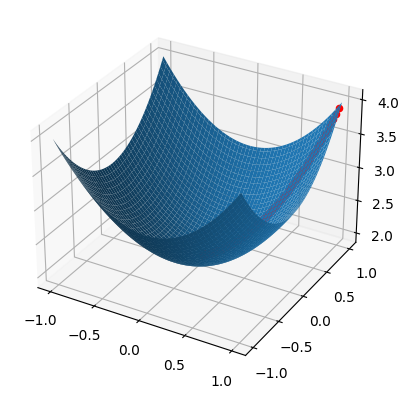

In [17]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def grafico3d(f, a=-1, b=1):
  global ax1, c
  # Creamos la figura
  fig = plt.figure()
  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')
  # Datos en array bi-dimensional
  a, b, n = a, b, 100
  x = np.linspace(a, b, n)
  y = np.linspace(a, b, n)

  X, Y = np.meshgrid(x, y)
  z = np.array([f([X[i], Y[i]]) for i in range(len(x))])
  ax1.plot_surface(X, Y, z)
  x0 = descendent_gradient(f, np.array([1, 1]), ax1)
  print(x0, f(x0))
  # Mostramos el gráfico
  plt.show()

f = lambda x: x[0]**2 + x[1]**2 + 2
grafico3d(f)

### Ejemplo 2

[0.41289519 0.00207884] 0.31754761967407114


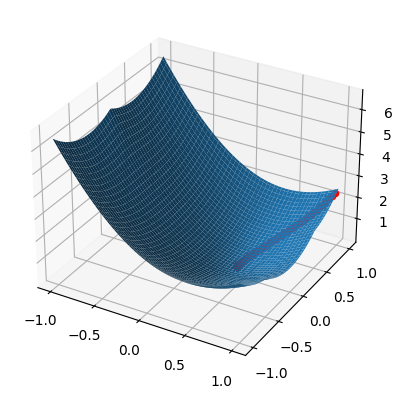

In [18]:
from random import uniform, randint

n = 3

#c = [(np.array([uniform(0, 10), uniform(0, 10)]), randint(1, 3)) for i in range(n)]
c = [(np.array([-1, 0]), 1), (np.array([1, 1/2]), 1/2), (np.array([1, -1/2]), 1/2)]
f = lambda x: (((x[0]-c[0][0][0])**2 + (x[1]-c[0][0][1])**2)**(1/2)-c[0][1])**2 + (((x[0]-c[1][0][0])**2 + (x[1]-c[1][0][1])**2)**(1/2)-c[1][1])**2 + (((x[0]-c[2][0][0])**2 + (x[1]-c[2][0][1])**2)**(1/2)-c[2][1])**2

a, b = -5, 5
# Creamos la figura
fig = plt.figure()
# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
# Datos en array bi-dimensional
a, b, n = -1, 1, 100
x = np.linspace(a, b, n)
y = np.linspace(a, b, n)

X, Y = np.meshgrid(x, y)
z = np.array([f([X[i], Y[i]]) for i in range(len(x))])
ax1.plot_surface(X, Y, z)
x0 = descendent_gradient(f, np.array([1, 1]), ax1)
print(x0, f(x0))
# Mostramos el gráfico
plt.show()

## Gauss-Newton

### Definición

In [20]:
import numpy as np
import sympy as sym
from pprint import pprint

def gauss_newton(r, x0, tol=0.001, iter=1000, fixed_lambda=50):
  """
  Función que calcula los parametros de una función usando minimos cuadrados no
  lineales
  Entradas: r: Función en Rn -> Rm con los errores relativos
            x0: valor inicial
            tol: tolerancia
            iter: maximo de iteraciones
  Salida: ans: tupla con los valores que solución el sistema de ecuaciones de
               los errores relativos obtenido y un mensaje en caso de que el
               metodo si converge, falla o no converge
  """
  simb_x = [sym.Symbol("x" + str(i)) for i in range(len(x0))] #Creación de variables simbolicas igual a la cantidad de elementos en el valor inicial
  mat = sym.Matrix(r(simb_x)) #sympy matrix para la función f de numpy
  Dr = sym.lambdify([simb_x], mat.jacobian(simb_x)) #Hallar la jacobiana y transformarla en un array de numpy
  i, y, ans, flag = 0, x0, None, True #Creación del iterador, respuesta del metodo, salida, y una bandera por si el metodo falla
  delta = np.array([1 for _ in range(len(x0))])
  while np.linalg.norm(delta) >= tol and i < iter and flag: #Mientras el resultado cumpla con la tolerancia, o no se halla llegado al numero de iteraciones o la bandera sea cierta
      #Sea A = Dr(x0)
      #Creación del sistema de ecuacions (ATA+lambda*diag(A^T, T))delta = ATr(x) => Ay = b
      # x_k+1 = x_k + delta
      A = Dr(x0)
      b = r(x0)
      b = -np.dot(np.transpose(A), b)
      A = np.dot(np.transpose(A), A)
      A += fixed_lambda*np.diag(np.diag(A))
      #Resolver el sistemas de ecuaciones usando QR Ax=b => QRx=b => Rx = Q^{-1}b => Rx = Q^Tb
      Q,R = np.linalg.qr(A) # qr decomposition of A
      QT = np.transpose(Q)
      y = np.dot(QT, b)
      delta = np.linalg.solve(R, y)
      x0 = np.array(delta + x0)
      i += 1
  if i >= iter and flag: ans = (np.array(x0), "No encontrado")
  elif flag: ans = (np.array(x0), "Encontrado")
  return ans

### Ejemplo 1

Calculo de la tercera ley de kepler

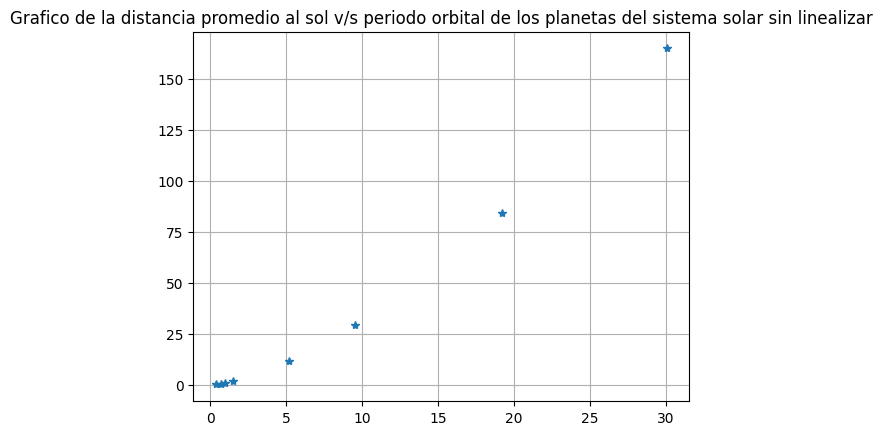

[2.00512438 2.99728601 1.0340563 ]
1.4948130088033837
Error: 0.3457994131077502%


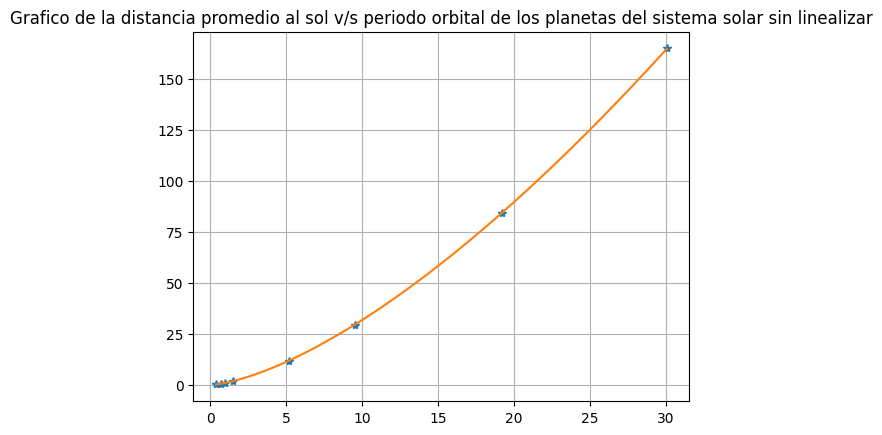

In [21]:
T = np.array([0.2408467, 0.61519726, 1.0000174, 1.8808476, 11.862615, 29.447498, 84.016846, 164.79132])
R = np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.539, 19.182, 30.060])
plt.plot(R, T, '*')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()

f = lambda x: np.array([(x[2]*R[i]**x[1])**(1/x[0])-T[i] for i in range(len(T))])
x, sms = gauss_newton(f, np.array([2.01, 2.99, 1.01]), tol=0.00001, iter=100)
g = lambda y: (x[2]*y**x[1])**(1/x[0])
# f = lambda x: np.array([(x[0]*(R[i]**x[1]))-T[i] for i in range(len(T))])
# x, sms = gauss_newton(f, np.array([0.9, 1.6]), tol=0.00001, iter=1000)
# g = lambda y: x[0]*y**(x[1])
ba = x[1]/x[0]
print(x)
print(ba)

print(f"Error: {(abs(ba-1.5)/1.5)*100}%")


xx = np.linspace(R[0], R[-1], 1000)
plt.plot(R, T, '*')
plt.plot(xx, g(xx), '-')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()

### Ejemplo 2

[6.2995295  0.50852861 2.24867086]


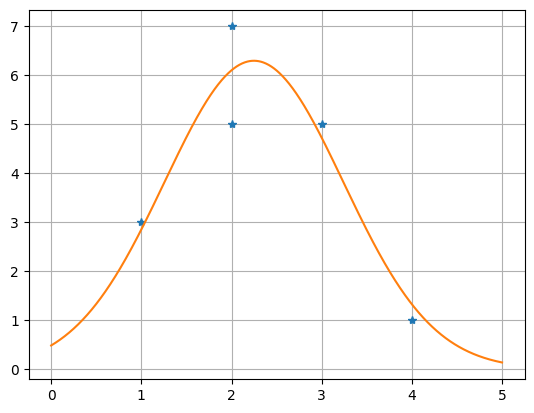

In [22]:
from math import e

points = [(1, 3), (2, 5), (2, 7), (3,5), (4,1)]
f = lambda x: np.array([x[0]*e**(-1*x[1]*(points[i][0]-x[2])**2) - points[i][1] for i in range(len(points))])
x, msg = gauss_newton(f, np.array([1, 1, 1]), tol=0.00001)
g = lambda y: x[0]*np.exp(-x[1]*(y-x[2])**2)
print(x)

xx = np.linspace(0, 5, 1000)
plt.plot([points[i][0] for i in range(len(points))], [points[i][1] for i in range(len(points))], '*')
plt.plot(xx, g(xx), '-')
plt.grid()
plt.show()


# **SVD**

Singular Values Descomposición

Toda Matriz se puede descomponer en

---

$
A=UΣV^T
$
---

Donde $U_{m \times m}$ y $V_{n \times n}$ son matrices ortogonales y $\Sigma_{m \times n}$ una matriz diagonal

---

Teorema A un matriz de mxn con rango r. Entonces existen matrices $U,Σ,V^T,$ tales que A=UΣV^T con

---

Sea A de rango complet y $A_{m \times n} ∧ m > n$ entonces

$
A = UΣV^T \\
AA^T = UΣV^T(UΣV^T)^T \\
AA^T = UΣV^TVΣ^TU^T \\
AA^T = UΣIΣ^TU^T \\
AA^TU = UΣ^2 \\
∀_{1<=i<=m} AA^Tu_i = \sigma_i^2u_i \text{ donde ui es el vector de la columna iesima }
$

Por lo tanto, $u_i$ son los vectores propios de $AA^T$ y $\sigma_i^2$ los valores propios de $AA^T$.

Si se conoce U y Σ, hallar V se hace de la forma

$
A = UΣV^T \\
U^TA = ΣV^T \\
Σ^{-1}U^TA = V^T \\
AU(Σ^{-1})^T = V
$

donde $Σ^{-1} = \begin{bmatrix}
1/σ_1 & 0 & ... & ... & 0\\
... & ... & ... & ... & 0\\
0 & ... & 1/σ_n  & ...& 0 \\
0 & ..... & 0 & .... & 0
\end{bmatrix}$

---

Otra forma

$
A = UΣV^T \\
A^TA = (UΣV^T)^TUΣV^T \\
A^TA = VΣ^TU^TUΣV^T \\
A^TA = VΣ^2V^T \\
A^TAV = VΣ^2 \\
∀_{1<=i<=m} AA^Tu_i = \sigma_i^2u_i \text{ donde ui es el vector de la columna iesima }
$

Por lo tanto, $v_i$ son los vectores propios de $A^TA$ y $\sigma_i^2$ los valores propios de $A^TA$.

Si se conoce V y Σ, hallar U se hace de la forma

$
A = UΣV^T \\
AV = UΣ \\
AVΣ^{-1} = U
$


---

In [23]:
import numpy as np

A = np.array([[1, 1, 3],
              [-2, 1, 0],
              [1, 0, -1]])

AAt = np.dot(A, np.transpose(A))

eigenvalues, eigenvectors = np.linalg.eig(AAt)
eigenvectors = np.transpose(eigenvectors)

ordenar = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
ordenar.sort()
print("-----------")

U = np.transpose([ordenar[i][1] for i in range(len(ordenar))])
sigma = np.array([np.zeros(3) for _ in range(3)])

for i in range(len(ordenar)):
  sigma[i,i] = ordenar[i][0]

VT = np.dot(np.linalg.inv(sigma), np.dot(np.transpose(U), A))

print(A)
print(np.dot(U, np.dot(sigma, VT)))

-----------
[[ 1  1  3]
 [-2  1  0]
 [ 1  0 -1]]
[[ 1.00000000e+00  1.00000000e+00  3.00000000e+00]
 [-2.00000000e+00  1.00000000e+00  3.15482173e-17]
 [ 1.00000000e+00  6.65557775e-18 -1.00000000e+00]]


## Inversa de Moore-Penrose

Sea una matriz $A$ (rectangular o cuadrada) de $m \times n$, se dice que una matriz $A^+$ es una inversa de Moore Penrose se A si cumple las siguientas 4 condiciones

---

*   $AA^+A = A$
*   $A^+AA^+ = A^+$
*   $(AA^+)^T = AA^+$
*   Elemento de la lista

---

Propiedades de $A^+$

1.   Si $A_{m \times n} A^+ A_{m \times n} ⇒ A^+$ es de tamaño $n \times m$
2.   Elemento de la lista

---

### Prueba, primera propiedad


Sea $A = U_{m \times m}Σ_{m \times n}(V^T)_{n \times n}$

$
AA^T = UΣV^T(UΣV^T)^T \\
AA^T = UΣV^TVΣ^TU^T \\
AA^T = UΣΣ^TU^T \\
AA^TA = UΣΣ^TU^TUΣV^T \\
AA^TA = UΣΣ^TΣV^T
$

Si $Σ_{m \times n}  = \begin{bmatrix}
σ_1 & 0 & ... & ... & 0\\
... & ... & ... & ... & 0\\
0 & ... & σ_r  & ...& 0 \\
0 & ..... & 0 & .... & 0
\end{bmatrix}_{m \times n} ⇒ Σ^{-1}_{n \times m} = \begin{bmatrix}
1/σ_1 & 0 & ... & ... & 0\\
... & ... & ... & ... & 0\\
0 & ... & 1/σ_r  & ...& 0 \\
0 & ..... & 0 & .... & 0
\end{bmatrix}_{n \times m}$

Por ende, $Σ_{m \times n} Σ^{-1}_{n \times m} = \begin{bmatrix}
1 & 0 & ... & ... & 0\\
... & ... & ... & ... & 0\\
0 & ... & 1  & ...& 0 \\
0 & ..... & 0 & .... & 0
\end{bmatrix}_{m \times m} = \begin{bmatrix}
I_{r \times r} & 0_{r \times m-r} \\
0_{m-r \times r} & 0_{m-r \times m-r} \\
\end{bmatrix}_{m \times m} = I^r_m$

$
AA^TA = UΣΣ^TΣV^T \\
AA^TA = UΣΣ^{-1}ΣV^T \\
AA^TA = UΣV^T \\
AA^TA = A
$

Por lo tanto, $A^T = A^+ = VΣ^{-1}U^T$

### Prueba, segunda propiedad

Sea $A = U_{m \times m}Σ_{m \times n}(V^T)_{n \times n}$

$
A^TA = (UΣV^T)^TUΣV^T \\
A^TA = VΣ^TU^TUΣV^T \\
A^TA = VΣ^TΣV^T \\
A^TAA^T = VΣ^TΣV^T(UΣV^T)^T \\
A^TAA^T = VΣ^TΣV^TVΣ^TU^T \\
A^TAA^T = VΣ^TΣΣ^TU^T
$

\\

donde $Σ_{m \times n}Σ^{-1}_{{n \times m}} = I^r_m$

\\

$
A^TAA^T = VΣ^TΣΣ^TU^T \\
A^TAA^T = VΣ^{-1}ΣΣ^{-1}U^T \\
A^TAA^T = VΣ^{-1}U^T \\
A^TAA^T = A^T
$

Por lo tanto, $A^T = A^+ = VΣ^{-1}U^T$

### Prueba, tercera propiedad

Sea $A = U_{m \times m}Σ_{m \times n}(V^T)_{n \times n} ∧ A^+ = V_{n \times n}Σ^{-1}_{n \times m} (U^T)_{m \times m}$

$
AA^+=UΣV^T (UΣV^T)^T \\
AA^+=UΣV^T VΣ^TU^T \\
AA^+=UΣΣ^TU^T \\
AA^+=UmI^r_mU^T \\
$



# Taller Minimos Cuadrados

Ecuaciones normales (Rango completo)

QR (No necesariamente rango completo)

SVD (No es necesario rango comleto)

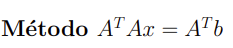

In [25]:
### Codigo de minimos cuadrados lineales de n variables de rango completo

import numpy as np
import scipy.linalg as la

def minimos_cuadrados(A, b):
  AT = np.transpose(A)
  ATA = np.dot(AT, A)
  print(ATA)
  ATb = np.dot(AT,b)
  P, L, U = la.lu(ATA)
  y = la.solve_triangular(L, np.dot(P, ATb), lower=True)
  x = la.solve_triangular(U, y, lower=False)
  return x



[[1015  105]
 [ 105   15]]
[ 5.18571429 -3.43333333]


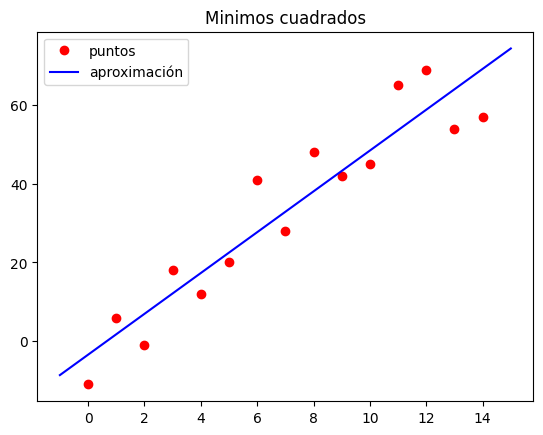

In [26]:
#Ejemplo

from random import randrange
import numpy as np
import matplotlib.pyplot as plt


n=15
f = lambda x: 5*x + randrange(-n, n)

x = np.array([i for i in range(n)])
y = np.array([f(x[i]) for i in range(n)])

A = np.array([[x[i], 1] for i in range(n)])
c = minimos_cuadrados(A, y)
print(c)

f = lambda x: c[0]*x+c[1]
xx = np.array([min(x)-1, max(x)+1])
plt.plot(x, y, "ro", label="puntos")
plt.plot(xx, f(xx), "b-", label="aproximación")
plt.title("Minimos cuadrados")
plt.legend()
plt.show()

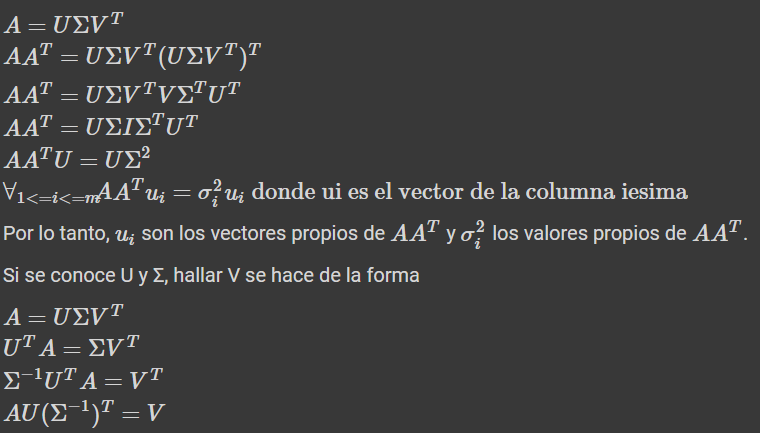

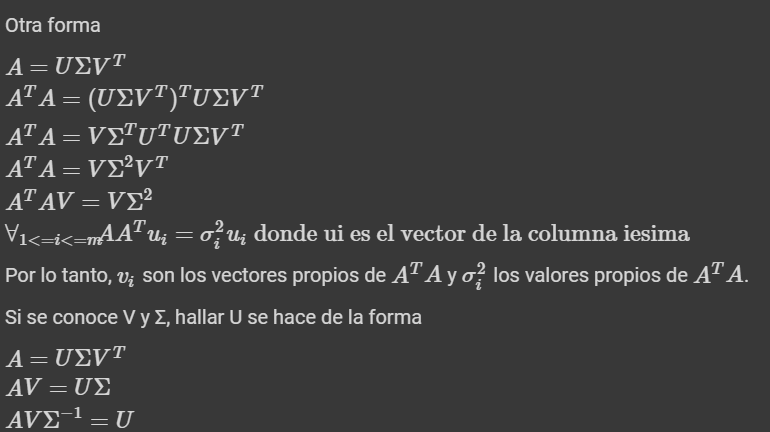

In [27]:
import numpy as np

def SVD(A):
  U, sigma, VT = None, None, None
  cual_usar = True
  if len(A) > len(A[0]):
    cual_usar = False;
  AAT = None
  if cual_usar: AAT = np.dot(A, np.transpose(A))
  else: AAT = np.dot(np.transpose(A), A)
  eigenvalues, eigenvectors = np.linalg.eig(AAT)
  eigenvectors = np.transpose(eigenvectors)
  ordenar = [(eigenvalues[i]**(1/2), eigenvectors[i]) for i in range(len(eigenvalues))]
  ordenar.sort(reverse=True)
  sigma = np.array([np.zeros(len(A[0])) for _ in range(len(A))])
  sigma_inv = np.zeros((len(sigma[0]), len(sigma)))
  for i in range(len(ordenar)):
    sigma[i,i] = ordenar[i][0]
    sigma_inv[i,i] = 1/sigma[i,i]
  if cual_usar:
    U = np.transpose([ordenar[i][1] for i in range(len(ordenar))])
    VT = np.dot(sigma_inv, np.dot(np.transpose(U), A))
  else:
    V = np.transpose([ordenar[i][1] for i in range(len(ordenar))])
    U = np.dot(A, np.dot(V, sigma_inv))
    VT = np.transpose(V)
  return (U, sigma, VT)

def solucion_min_cuad_SVD(A, b):
  U, sigma, VT = SVD(A)
  # (U1, sigma1, VT1) = np.linalg.svd(A)
  V, UT = np.transpose(VT), np.transpose(U)
  sigma_inv = np.zeros((len(sigma[0]), len(sigma)))
  for i in range(len(sigma[0])):
    sigma_inv[i,i] = 1/sigma[i,i]
  Ainv = np.dot(V, np.dot(sigma_inv, UT))
  x = np.dot(Ainv, b)
  return x


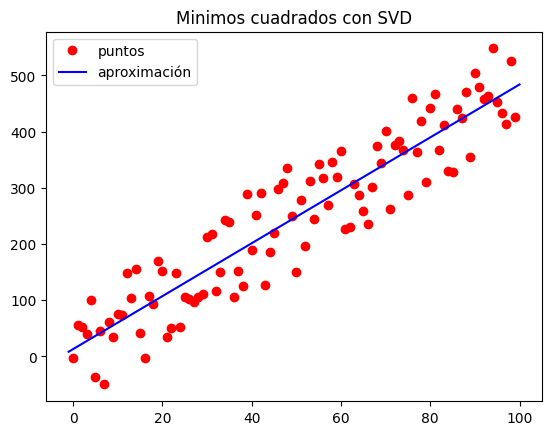

In [28]:
n=100
f = lambda x: 5*x + randrange(-n, n)

x = np.array([i for i in range(n)])
y = np.array([f(x[i]) for i in range(n)])

A = np.array([[x[i], 1] for i in range(n)])
c = solucion_min_cuad_SVD(A, y)

f = lambda x: c[0]*x+c[1]
xx = np.array([min(x)-1, max(x)+1])
plt.plot(x, y, "ro", label="puntos")
plt.plot(xx, f(xx), "b-", label="aproximación")
plt.title("Minimos cuadrados con SVD")
plt.legend()
plt.show()

# PCA

In [30]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()
data = np.array(iris.data)
clas = np.array(iris.target)

iris_data_set = np.transpose(np.vstack(((np.transpose(data), clas))))
data = {}
column = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"];
for i in range(len(column)):
  data[column[i]] = np.array(iris_data_set[:,i])

iris_data_set = pd.DataFrame(data)

print(iris_data_set)

     Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0             5.1          3.5           1.4          0.2    0.0
1             4.9          3.0           1.4          0.2    0.0
2             4.7          3.2           1.3          0.2    0.0
3             4.6          3.1           1.5          0.2    0.0
4             5.0          3.6           1.4          0.2    0.0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3    2.0
146           6.3          2.5           5.0          1.9    2.0
147           6.5          3.0           5.2          2.0    2.0
148           6.2          3.4           5.4          2.3    2.0
149           5.9          3.0           5.1          1.8    2.0

[150 rows x 5 columns]


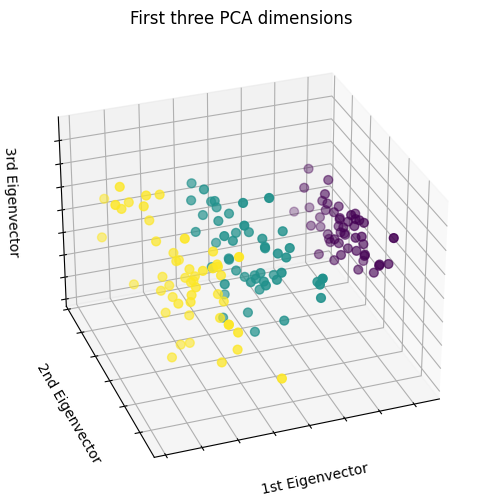

In [31]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

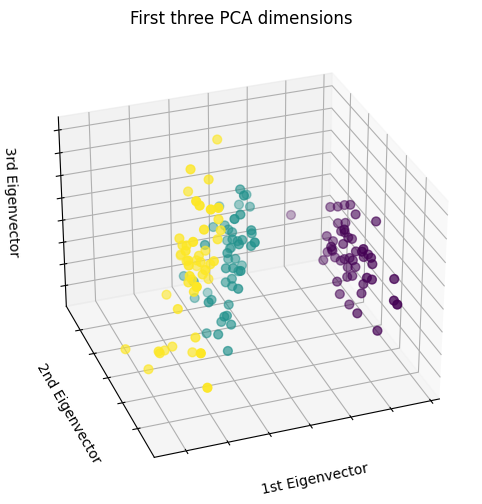

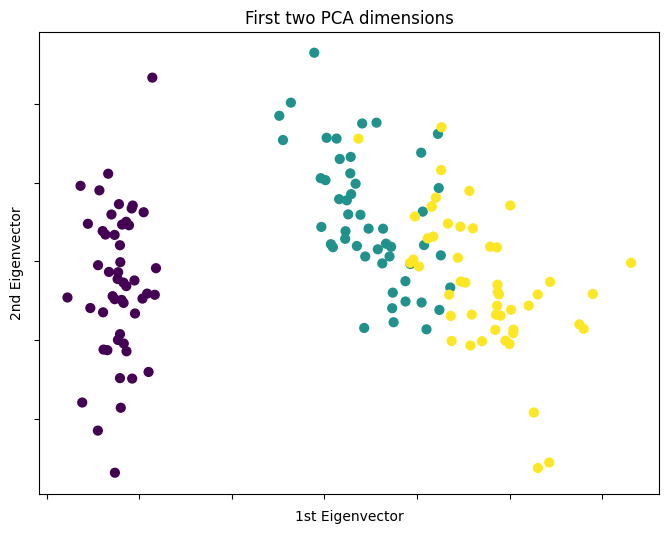

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(iris.data)

for i in range(4):
  media = np.mean(data[:,i])
  std = np.std(data[:,i])
  for j in range(len(data)):
    data[j,i] = (data[j,i]-media)/std

U, sigma, Vh = np.linalg.svd(data)

V = np.transpose(Vh)
V_truncate = V[:, 0:3]
new_base = np.dot(data, V_truncate)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    new_base[:, 0],
    new_base[:, 1],
    new_base[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

# Hacer el gráfico de dispersión
scatter = ax.scatter(
    new_base[:, 0],
    new_base[:, 1],
    c=iris.target,
    s=40,
)

ax.set_title("First two PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

In [33]:
print(iris.target)
print(len(iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


# Hallar Auto Valores

In [34]:
import numpy as np

def vector_propio_con_mayor_direccion(A, x, n=1000):
  v1 = x * (1/np.linalg.norm(x))
  for i in range(n):
    v1 = np.dot(A, v1)
    v1 = v1 * (1/np.linalg.norm(v1))
    lambda1 = np.dot(v1, np.dot(A, v1))
  v2 = x * (1/np.linalg.norm(x))
  for i in range(n):
    v2 = np.dot((A-(lambda1*np.identity(len(A)))), v2)
    v2 = v2 * (1/np.linalg.norm(v2))
    lambda2 = np.dot(v2, np.dot(A, v2))
  return [(v1, lambda1), (v2, lambda2)]

A = np.array([[1, 3], [2, 2]])
x = np.array([10, 28])

ans = vector_propio_con_mayor_direccion(A, x)

print(ans[0][0], ans[0][1])
print(ans[1][0], ans[1][1])
print(np.dot(ans[0][0],ans[0][0]))
print(np.dot(ans[1][0],ans[1][0]))

[0.70710678 0.70710678] 4.000000000000001
[-0.83205029  0.5547002 ] -0.9999999999999999
1.0000000000000002
0.9999999999999998


In [35]:
import numpy as np

def autovectores(A, n=1000):
  for i in range(n):
    Q,R = np.linalg.qr(A)
    A = np.dot(A, Q)
  return A

A = np.array([[1, 3], [2, 2]])
print(autovectores(A))

[[ 1.24549643 -2.9066714 ]
 [-0.16627142 -2.82353569]]


# Vectores Propios Generalizados

Recordatorio Lagrange

---
$
R(x) \\
B(x) = b
$

Entonces

$
L(x)
$
---

$
Ax = λBx
$

In [38]:
import numpy as np
import sympy as sp

def solucion(A, b):
  lambda_ = sp.symbols('lambda')
  C = sp.Matrix(A-lambda_*B)
  equation = sp.Eq(C.det(), 0)
  solution = sp.solve(equation, lambda_)
  print(C)
  print(equation)
  return solution

A = np.array([[1, 2], [0, 3]])
B = np.array([[1, 0],[0, 0]])


print(solucion(A, B))
# print(solucion(np.dot(np.linalg.inv(B), A)), np.eye(len(A)))
print()

A = np.array([[1, 2], [0, 3]])
B = np.array([[4, 1],[1, 4]])

print(np.linalg.solve(B, A))

print(solucion(A, B))
print(solucion(np.dot(np.linalg.inv(B), A), np.eye(len(A))))
print()


Matrix([[1 - lambda, 2], [0, 3]])
Eq(3 - 3*lambda, 0)
[1]

[[ 0.26666667  0.33333333]
 [-0.06666667  0.66666667]]
Matrix([[1 - 4*lambda, 2 - lambda], [-lambda, 3 - 4*lambda]])
Eq(15*lambda**2 - 14*lambda + 3, 0)
[1/3, 3/5]
Matrix([[0.266666666666667 - 4*lambda, 0.333333333333333 - lambda], [-lambda - 0.0666666666666667, 0.666666666666667 - 4*lambda]])
Eq(15*lambda**2 - 3.46666666666667*lambda + 0.2, 0)
[0.111111111111111, 0.120000000000000]



$
Ax = \lambda B x \\
Ax - \lambda B x = 0 \\
(A - \lambda B)x = 0 \\
(B^{-1} A - \lambda I)x = 0
$

# Taller SVD

In [37]:
import numpy as np

A = np.array([[3, 1, 1],[-1, 3, 1]])
ATA = np.dot(A.T, A)

VT = np.array([[1, 2, 1],[-2, 1, 0], [-1, -2, 5]])

S = np.array([[12**(1/2), 0, 0], [0, 10**(1/2), 0], [0, 0, 0]])
S1 = np.array([[1/S[i][j] if S[i][j] != 0 else 0 for j in range(3)] for i in range(3)])

U = np.dot(A,np.dot(VT.T, S1))
U = U/np.linalg.norm(U)

U, S, VT = SVD(A)
print(U)
print(S)
print(VT)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]
[[ 0.40824829  0.81649658  0.40824829]
 [-0.89442719  0.4472136   0.        ]
 [ 0.          0.          0.        ]]
